In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import files

In [61]:
# Import 3 CSV files. Save main course csv as df
df = pd.read_csv('course.csv')
city = pd.read_csv('city.csv')
state = pd.read_csv('state.csv')


# Data Cleaning

In [62]:
# 15,606 golf courses
df.shape

(15606, 34)

In [63]:
df.head()

,id,city_id,title,street,address,zip_code,phone,hole,architect,year_built,...,championship_slope,championship_usga,middle_par,middle_yards,middle_slope,middle_usga,forward_par,forward_yards,forward_slope,forward_usga
0,1,1,Albertville Golf & Country Club,Country Club Rd,"Albertville, Alabama 35950",35950.0,(256) 878-4403,18.0,Leon Howard,1966,...,118,68.80,72,6068,117,68.00,72,5196,NaN,NaN
1,2,1,A. J. Jolly Golf Course,5350 S US Hwy 27,"Alexandria, Kentucky 41001",41001.0,(606) 635-2106,18.0,NaN,1962,...,118,69.30,71,5942,115,67.60,75,5418,118,70.30
2,3,2,Willow Point Country Club,3054 Willow Point Rd,"Alexander City, Alabama 35010",35010.0,(256) 234-2572,18.0,Thomas H. Nicol,1961,...,137,74.60,72,6631,135,72.20,73,5373,120,70.70
3,4,3,Alpine Bay Resort,9855 Renfroe Rd,"Alpine, Alabama 35014",35014.0,(256) 268-2920,18.0,"Robert Trent Jones, Sr.",1972,...,129,70.90,72,6518,126,69.90,72,5518,120,69.80
4,5,4,Maple Hills Golf,Hwy 75,"Altoona, Alabama 35952",35952.0,(205) 466-7600,9.0,Bill Ellison,1975,...,NaN,NaN,31,1800,NaN,NaN,31,1800,NaN,NaN


In [64]:
df.iloc[:,10:].head()

,public_private,guest_policy,credit_card,golf_season,range,rental_club,pro_in_House,metal_spikes_okay,weekday,weekend,...,championship_slope,championship_usga,middle_par,middle_yards,middle_slope,middle_usga,forward_par,forward_yards,forward_slope,forward_usga
0,Private,Closed,None,year round,No,No,No,Yes,$,$,...,118,68.80,72,6068,117,68.00,72,5196,NaN,NaN
1,Public,Open,"VISA, MasterCard Welcomed",year round,No,Yes,Yes,Yes,$,$,...,118,69.30,71,5942,115,67.60,75,5418,118,70.30
2,Private,Closed,"VISA, MasterCard, Amex Accepted",year round,Yes,Yes,Yes,Yes,$,$,...,137,74.60,72,6631,135,72.20,73,5373,120,70.70
3,Resort,Open,"VISA, MasterCard, Amex, Discover Accepted",year round,Yes,Yes,Yes,No,$,$,...,129,70.90,72,6518,126,69.90,72,5518,120,69.80
4,Public,Open,None,year round,No,No,Yes,Yes,$,$,...,NaN,NaN,31,1800,NaN,NaN,31,1800,NaN,NaN


In [65]:
df.columns

Index(['id', 'city_id', 'title', 'street', 'address', 'zip_code', 'phone',
       'hole', 'architect', 'year_built', 'public_private', 'guest_policy',
       'credit_card', 'golf_season', 'range', 'rental_club', 'pro_in_House',
       'metal_spikes_okay', 'weekday', 'weekend', 'tee_time_welcomed',
       'rental_cart_available', 'championship_par', 'championship_yards',
       'championship_slope', 'championship_usga', 'middle_par', 'middle_yards',
       'middle_slope', 'middle_usga', 'forward_par', 'forward_yards',
       'forward_slope', 'forward_usga'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15606 entries, 0 to 15605
Data columns (total 34 columns):
id                       15606 non-null int64
city_id                  15606 non-null int64
title                    15606 non-null object
street                   15606 non-null object
address                  15606 non-null object
zip_code                 15574 non-null float64
phone                    15121 non-null object
hole                     15389 non-null float64
architect                10181 non-null object
year_built               14369 non-null object
public_private           15379 non-null object
guest_policy             15322 non-null object
credit_card              15383 non-null object
golf_season              15370 non-null object
range                    15382 non-null object
rental_club              15373 non-null object
pro_in_House             15376 non-null object
metal_spikes_okay        15372 non-null object
weekday                  15264 non-null objec

In [67]:
df.isnull().sum()

id                          0
city_id                     0
title                       0
street                      0
address                     0
zip_code                   32
phone                     485
hole                      217
architect                5425
year_built               1237
public_private            227
guest_policy              284
credit_card               223
golf_season               236
range                     224
rental_club               233
pro_in_House              230
metal_spikes_okay         234
weekday                   342
weekend                   322
tee_time_welcomed         188
rental_cart_available     200
championship_par         4901
championship_yards       4892
championship_slope       6070
championship_usga        6012
middle_par                285
middle_yards              285
middle_slope             3338
middle_usga              3174
forward_par               289
forward_yards             288
forward_slope            3845
forward_us

In [68]:
# 6070 out of 15606 courses have a null slope
df.championship_slope.isnull().sum()

6070

In [69]:
df.iloc[8902,21:] = [x[6:] for x in df.iloc[8902,21:]]

In [70]:
df.columns

Index(['id', 'city_id', 'title', 'street', 'address', 'zip_code', 'phone',
       'hole', 'architect', 'year_built', 'public_private', 'guest_policy',
       'credit_card', 'golf_season', 'range', 'rental_club', 'pro_in_House',
       'metal_spikes_okay', 'weekday', 'weekend', 'tee_time_welcomed',
       'rental_cart_available', 'championship_par', 'championship_yards',
       'championship_slope', 'championship_usga', 'middle_par', 'middle_yards',
       'middle_slope', 'middle_usga', 'forward_par', 'forward_yards',
       'forward_slope', 'forward_usga'],
      dtype='object')

In [71]:
df.isnull().sum()

id                          0
city_id                     0
title                       0
street                      0
address                     0
zip_code                   32
phone                     485
hole                      217
architect                5425
year_built               1237
public_private            227
guest_policy              284
credit_card               223
golf_season               236
range                     224
rental_club               233
pro_in_House              230
metal_spikes_okay         234
weekday                   342
weekend                   322
tee_time_welcomed         188
rental_cart_available     200
championship_par         4901
championship_yards       4892
championship_slope       6070
championship_usga        6012
middle_par                285
middle_yards              285
middle_slope             3338
middle_usga              3174
forward_par               289
forward_yards             288
forward_slope            3845
forward_us

In [72]:
# Make columns that are able to be numeric. Make items that give errors into nulls. There are only a couple of these.
df[['championship_par', 'championship_yards',
       'championship_slope', 'championship_usga', 'middle_par', 'middle_yards',
       'middle_slope', 'middle_usga', 'forward_par', 'forward_yards',
       'forward_slope', 'forward_usga']] = df[['championship_par', 'championship_yards',
       'championship_slope', 'championship_usga', 'middle_par', 'middle_yards',
       'middle_slope', 'middle_usga', 'forward_par', 'forward_yards',
       'forward_slope', 'forward_usga']].apply(pd.to_numeric, errors='coerce')

In [73]:
# Drop rows that have nulls in middle_slope or middle usga
df.dropna(subset=[['middle_slope', 'middle_usga']], inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12139 entries, 0 to 15605
Data columns (total 34 columns):
id                       12139 non-null int64
city_id                  12139 non-null int64
title                    12139 non-null object
street                   12139 non-null object
address                  12139 non-null object
zip_code                 12134 non-null float64
phone                    11831 non-null object
hole                     11966 non-null float64
architect                8478 non-null object
year_built               11370 non-null object
public_private           11965 non-null object
guest_policy             11963 non-null object
credit_card              11966 non-null object
golf_season              11962 non-null object
range                    11965 non-null object
rental_club              11964 non-null object
pro_in_House             11965 non-null object
metal_spikes_okay        11964 non-null object
weekday                  11895 non-null object

In [75]:
df.isnull().sum()

id                          0
city_id                     0
title                       0
street                      0
address                     0
zip_code                    5
phone                     308
hole                      173
architect                3661
year_built                769
public_private            174
guest_policy              176
credit_card               173
golf_season               177
range                     174
rental_club               175
pro_in_House              174
metal_spikes_okay         175
weekday                   244
weekend                   224
tee_time_welcomed         165
rental_cart_available     170
championship_par         2468
championship_yards       2462
championship_slope       2731
championship_usga        2736
middle_par                  0
middle_yards                0
middle_slope                0
middle_usga                 0
forward_par                 5
forward_yards               3
forward_slope             546
forward_us

# EDA

In [76]:

df.corr()

,id,city_id,zip_code,hole,championship_par,championship_yards,championship_slope,championship_usga,middle_par,middle_yards,middle_slope,middle_usga,forward_par,forward_yards,forward_slope,forward_usga
id,1.000000,0.998062,-0.150963,-0.027500,-0.015099,-0.015625,-0.067011,-0.020432,-0.017659,-0.007789,-0.019313,-0.019461,-0.013270,-0.017988,-0.035397,-0.024458
city_id,0.998062,1.000000,-0.144507,-0.021637,-0.010222,-0.010612,-0.066975,-0.015943,-0.012405,-0.003045,-0.020109,-0.014301,-0.008048,-0.012537,-0.033101,-0.018817
zip_code,-0.150963,-0.144507,1.000000,-0.063900,-0.032041,-0.009573,-0.044720,-0.030966,-0.063553,-0.057188,-0.105317,-0.071211,-0.067162,-0.030741,-0.015940,-0.067291
hole,-0.027500,-0.021637,-0.063900,1.000000,0.965085,0.886145,0.242404,0.924987,0.980501,0.928184,0.341980,0.963385,0.978361,0.911361,0.264774,0.957227
championship_par,-0.015099,-0.010222,-0.032041,0.965085,1.000000,0.939486,0.314399,0.959878,0.999246,0.935821,0.323688,0.963417,0.993478,0.895276,0.281372,0.946914
championship_yards,-0.015625,-0.010612,-0.009573,0.886145,0.939486,1.000000,0.507365,0.950061,0.939739,0.990624,0.498788,0.947617,0.932525,0.913481,0.417861,0.915197
championship_slope,-0.067011,-0.066975,-0.044720,0.242404,0.314399,0.507365,1.000000,0.436133,0.315675,0.494761,0.959934,0.421601,0.306193,0.368285,0.688005,0.359035
championship_usga,-0.020432,-0.015943,-0.030966,0.924987,0.959878,0.950061,0.436133,1.000000,0.960813,0.943510,0.424970,0.996621,0.954950,0.877639,0.358326,0.967737
middle_par,-0.017659,-0.012405,-0.063553,0.980501,0.999246,0.939739,0.315675,0.960813,1.000000,0.961206,0.405229,0.975882,0.996454,0.939852,0.323117,0.969695
middle_yards,-0.007789,-0.003045,-0.057188,0.928184,0.935821,0.990624,0.494761,0.943510,0.961206,1.000000,0.546088,0.964830,0.959028,0.964704,0.452287,0.953713


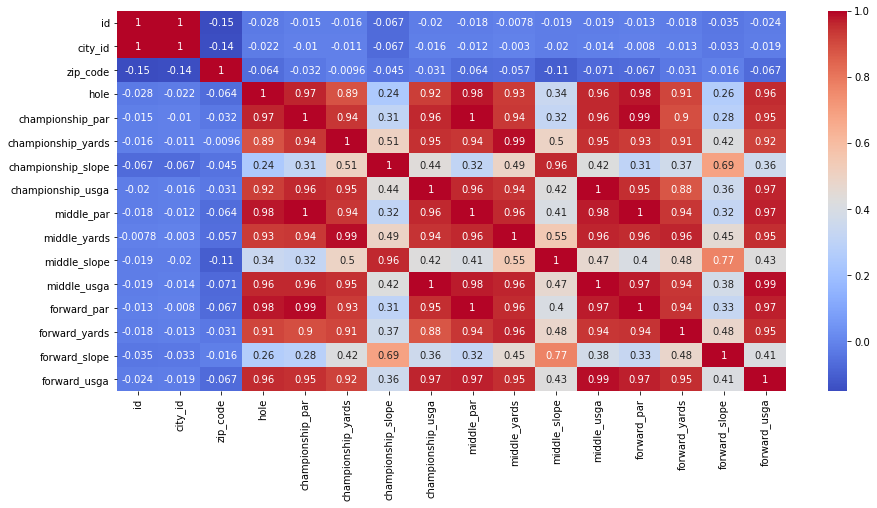

In [77]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Seems like slope is the only one that isn't really highly correlated with the others.
### Which is surprising since slope and course rating ('usga') both judge the difficulty of courses

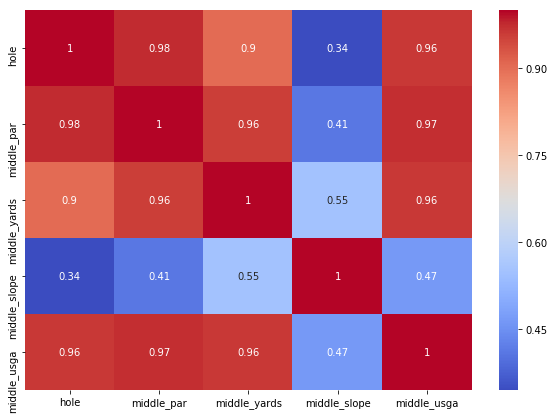

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(df[['hole', 'middle_par', 'middle_yards',
       'middle_slope', 'middle_usga']].corr(), annot=True, cmap='coolwarm')

In [79]:
df.describe()

,id,city_id,zip_code,hole,championship_par,championship_yards,championship_slope,championship_usga,middle_par,middle_yards,middle_slope,middle_usga,forward_par,forward_yards,forward_slope,forward_usga
count,12139.000000,12139.000000,12134.00000,11966.000000,9671.000000,9677.000000,9408.000000,9403.000000,12139.000000,12139.000000,12139.000000,12139.000000,12134.000000,12136.000000,11593.000000,11605.000000
mean,7841.610512,3900.123157,48632.65436,16.305867,68.691035,6298.250904,124.774766,69.045940,64.461488,5502.363951,118.231073,62.659729,65.012197,4715.894858,116.575347,63.737579
std,4592.492385,2490.193900,27118.98009,3.533595,9.612464,1031.863658,9.353264,9.332886,14.225182,1366.339170,10.128946,14.094804,14.268418,1153.444338,9.162000,13.687574
min,1.000000,1.000000,604.00000,9.000000,27.000000,1021.000000,0.000000,0.000000,24.000000,867.000000,0.000000,0.000000,27.000000,784.000000,0.000000,0.000000
25%,3744.000000,1464.500000,29322.75000,18.000000,71.000000,6304.000000,119.000000,70.000000,70.000000,5595.000000,113.000000,66.500000,70.000000,4683.000000,112.000000,66.500000
50%,7873.000000,3727.000000,46818.00000,18.000000,72.000000,6577.000000,125.000000,71.500000,71.000000,6102.000000,119.000000,69.100000,72.000000,5158.000000,117.000000,69.500000
75%,11835.000000,6144.000000,70067.25000,18.000000,72.000000,6816.000000,131.000000,72.700000,72.000000,6347.000000,125.000000,70.500000,72.000000,5445.000000,123.000000,71.300000
max,15754.000000,8223.000000,99709.00000,36.000000,75.000000,7728.000000,162.000000,78.600000,75.000000,7611.000000,158.000000,77.700000,79.000000,6776.000000,150.000000,79.200000


ValueError: max must be larger than min in range parameter.

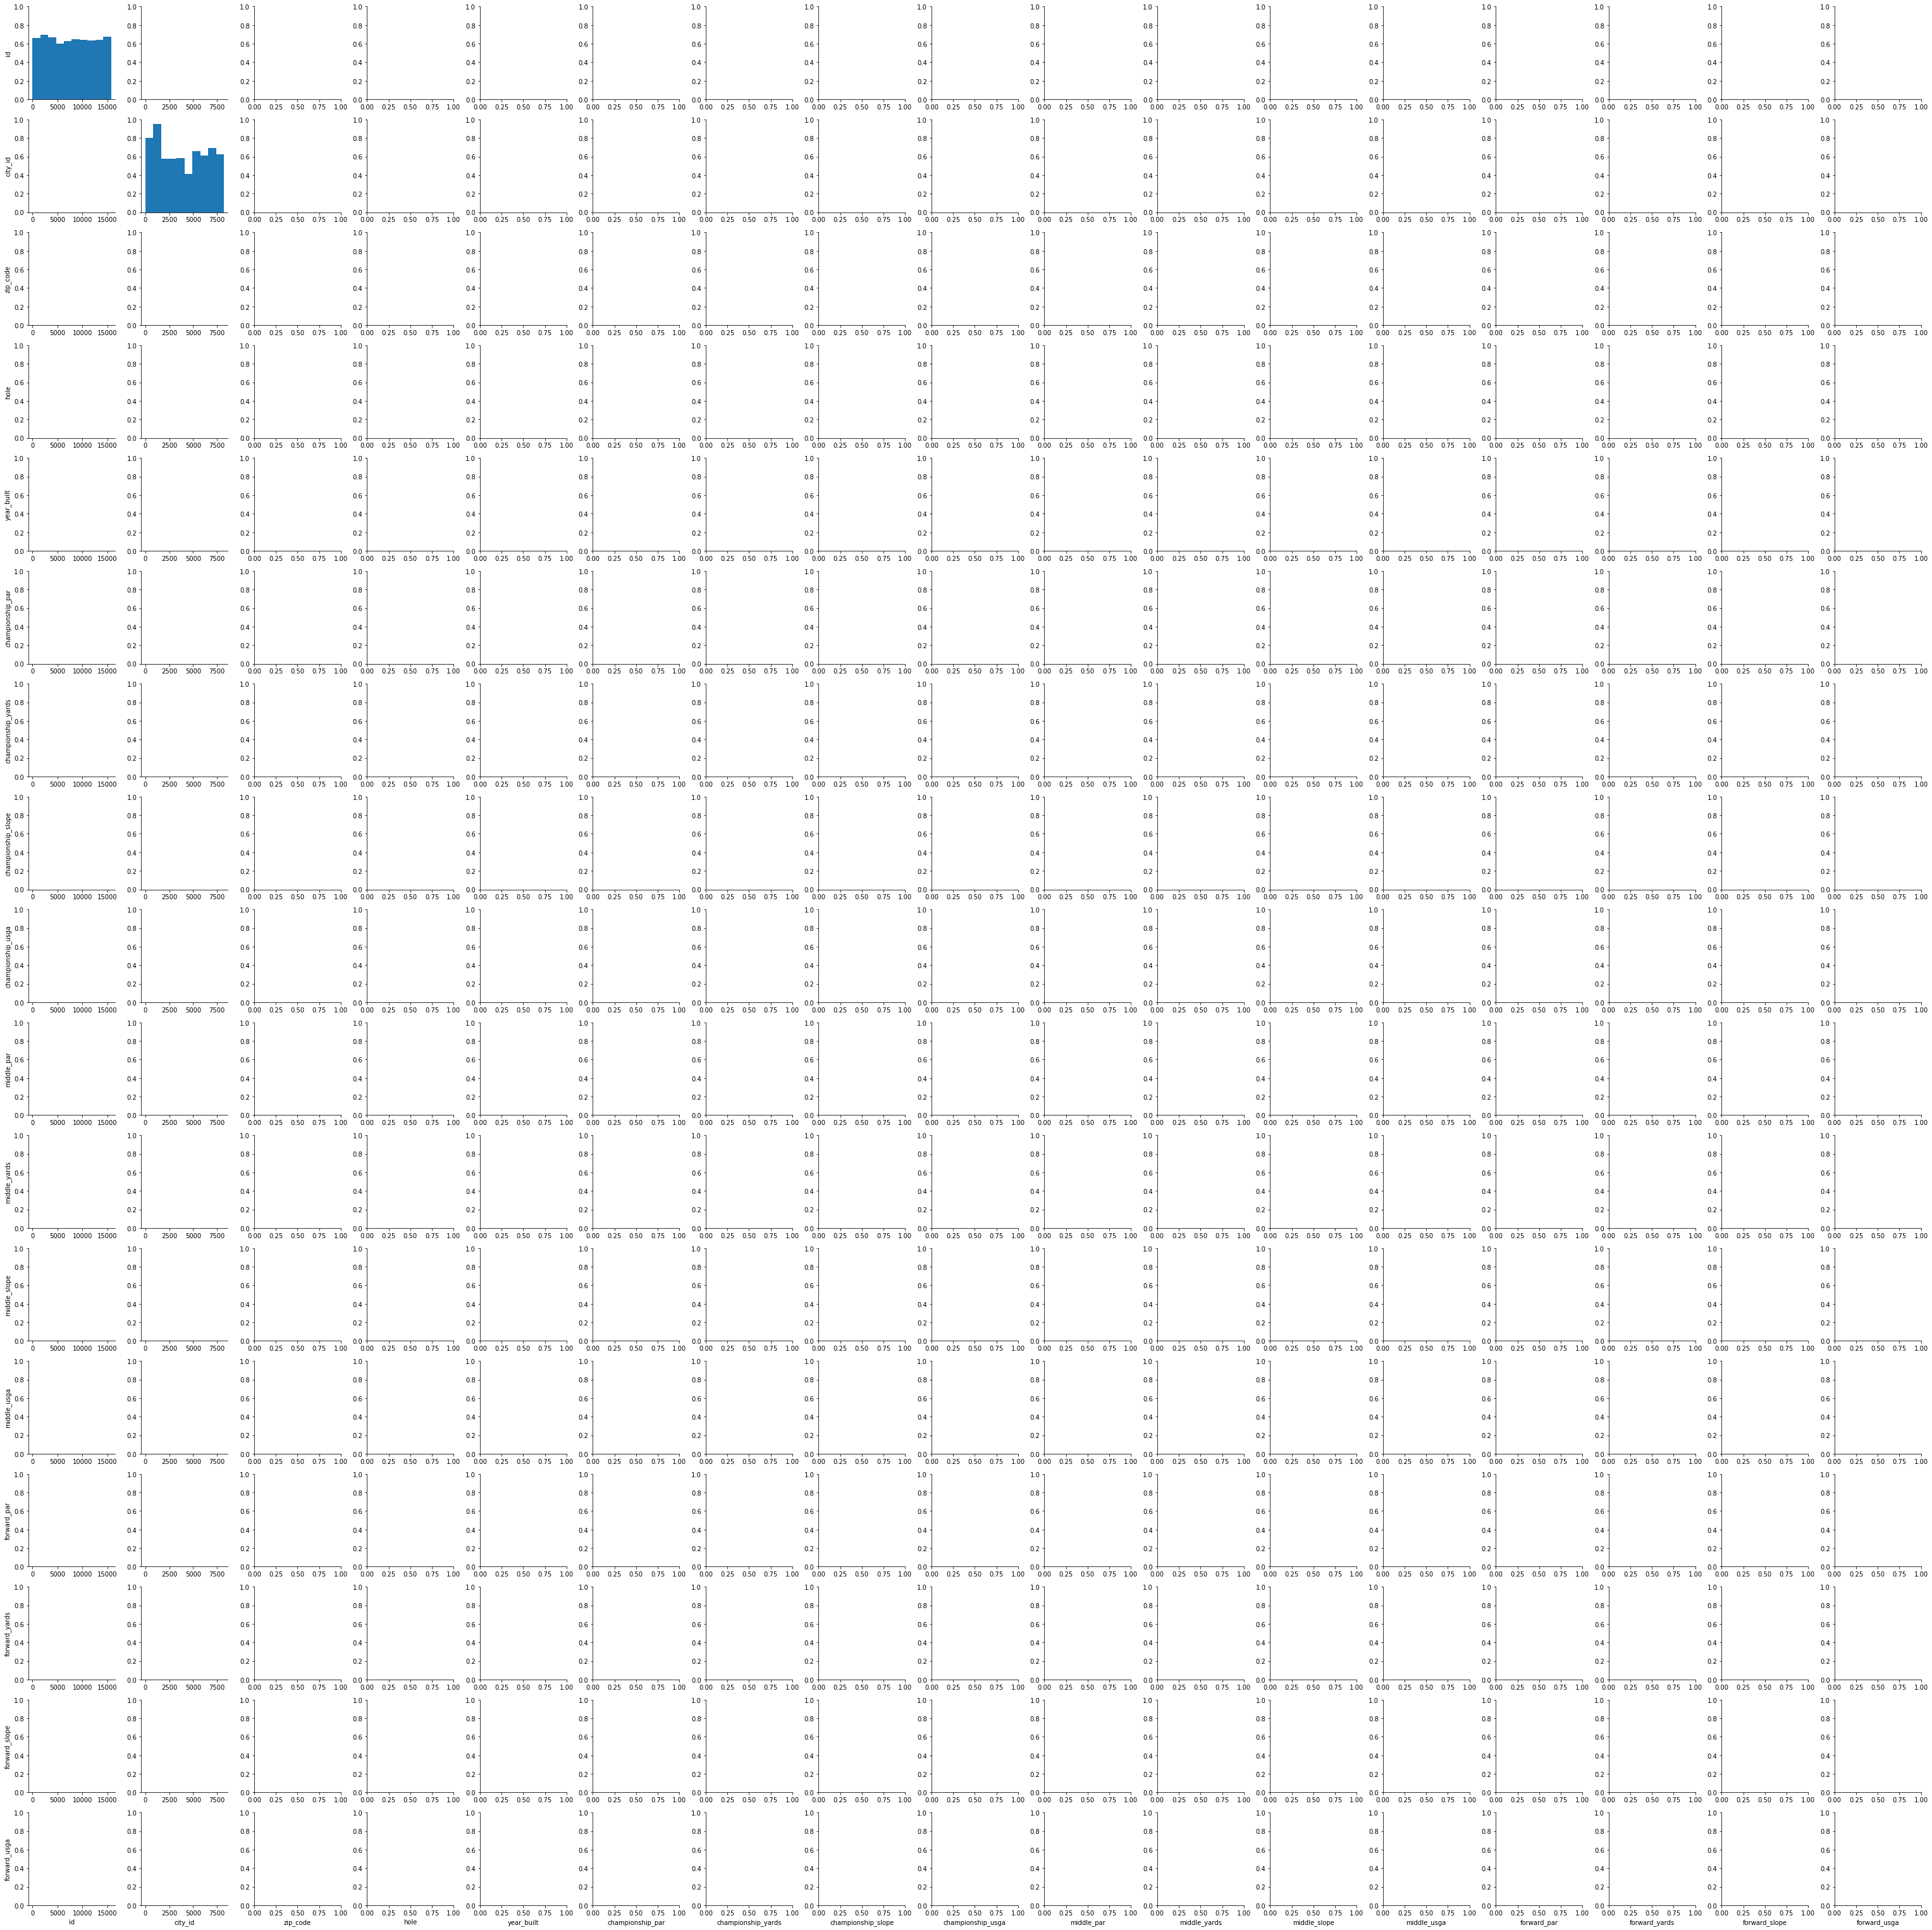

In [83]:
sns.pairplot(df)

In [84]:
# 9696 of 1239 courses are 18 holes
df['hole'].value_counts()

18.0    9696
9.0     2253
27.0       4
10.0       4
11.0       3
19.0       2
36.0       1
30.0       1
12.0       1
14.0       1
Name: hole, dtype: int64

In [91]:
df.loc[df['hole']==27.0,:]

,id,city_id,title,street,address,zip_code,phone,hole,architect,year_built,...,championship_slope,championship_usga,middle_par,middle_yards,middle_slope,middle_usga,forward_par,forward_yards,forward_slope,forward_usga
1936,1988,863,Lake/Valley at Pinery Country Club,6900 E Pinery Pkwy,"Parker, Colorado 80134",80134.0,(303) 841-2850,27.0,NaN,1975,...,126.0,72.1,72.0,6297.0,115.0,68.7,73.0,5828.0,126.0,71.30
2426,2482,1074,Pelican Sound Golf & River Club,4561 Pelican Sound Blvd,"Estero, Florida 33928",33928.0,(239) 498-9095,27.0,Chip Powell &amp; Mike Hill,1998,...,142.0,73.0,71.0,6297.0,137.0,70.9,71.0,5108.0,123.0,70.81
7333,7417,3490,Copper Hills Golf & Country Club,2125 Lakeville Rd,"Oxford, Michigan 48370",48370.0,(248) 969-9808,27.0,Curtis Wright,1997,...,145.0,73.1,72.0,6401.0,141.0,71.4,72.0,5498.0,133.0,72.50
11307,11433,5922,River/Greens at River Greens Golf Course,22749 State Route 751,"West Lafayette, Ohio 43845",43845.0,(740) 545-7817,27.0,Jack Kidwell,1968,...,120.0,71.1,72.0,6094.0,114.0,68.5,73.0,6324.0,115.0,70.10


In [92]:
df['public_private'].value_counts()

Public                                                          4989
Private                                                         3509
Semi-Private                                                    2561
Resort                                                           733
Military                                                         165
Semi Private                                                       7
Private--only accepting public play during the summer season       1
Name: public_private, dtype: int64

In [85]:
df.columns

Index(['id', 'city_id', 'title', 'street', 'address', 'zip_code', 'phone',
       'hole', 'architect', 'year_built', 'public_private', 'guest_policy',
       'credit_card', 'golf_season', 'range', 'rental_club', 'pro_in_House',
       'metal_spikes_okay', 'weekday', 'weekend', 'tee_time_welcomed',
       'rental_cart_available', 'championship_par', 'championship_yards',
       'championship_slope', 'championship_usga', 'middle_par', 'middle_yards',
       'middle_slope', 'middle_usga', 'forward_par', 'forward_yards',
       'forward_slope', 'forward_usga'],
      dtype='object')

In [86]:
df['public_private'].value_counts()

Public                                                          4989
Private                                                         3509
Semi-Private                                                    2561
Resort                                                           733
Military                                                         165
Semi Private                                                       7
Private--only accepting public play during the summer season       1
Name: public_private, dtype: int64

(array([  4.70000000e+01,   3.49000000e+02,   1.87500000e+03,
          1.00000000e+00,   0.00000000e+00,   9.00000000e+00,
          2.90000000e+01,   1.44000000e+02,   2.07000000e+02,
          9.47800000e+03]),
 array([ 24. ,  29.1,  34.2,  39.3,  44.4,  49.5,  54.6,  59.7,  64.8,
         69.9,  75. ]),
 <a list of 10 Patch objects>)

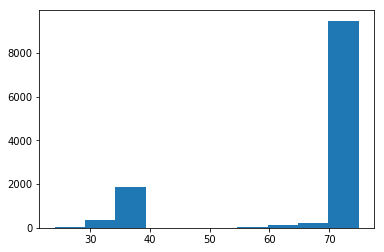

In [87]:
plt.hist(df['middle_par'])

(array([   28.,   152.,   804.,  1388.,    89.,    79.,   475.,  5022.,
         4073.,    29.]),
 array([  867. ,  1541.4,  2215.8,  2890.2,  3564.6,  4239. ,  4913.4,
         5587.8,  6262.2,  6936.6,  7611. ]),
 <a list of 10 Patch objects>)

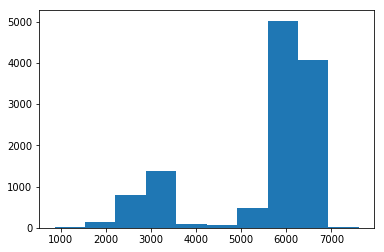

In [88]:
plt.hist(df['middle_yards'])

(array([  1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          5.00000000e+00,   3.60000000e+01,   2.85000000e+02,
          1.81100000e+03,   7.73200000e+03,   2.24000000e+03,
          2.70000000e+01]),
 array([   0. ,   15.8,   31.6,   47.4,   63.2,   79. ,   94.8,  110.6,
         126.4,  142.2,  158. ]),
 <a list of 10 Patch objects>)

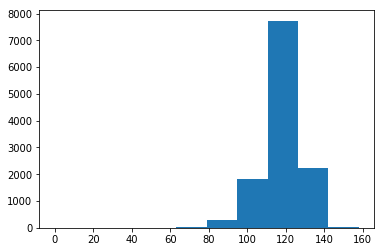

In [89]:
plt.hist(df['middle_slope'])

(array([  1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+02,   2.04200000e+03,   1.00000000e+00,
          2.10000000e+01,   2.09000000e+02,   5.42500000e+03,
          4.23800000e+03]),
 array([  0.  ,   7.77,  15.54,  23.31,  31.08,  38.85,  46.62,  54.39,
         62.16,  69.93,  77.7 ]),
 <a list of 10 Patch objects>)

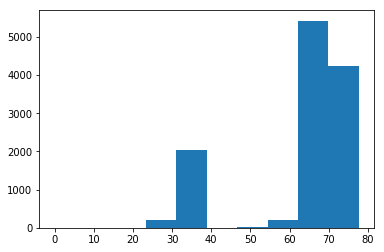

In [90]:
plt.hist(df['middle_usga'])

(array([  814.,   266.,   370.,  1319.,   682.,   444.,  1928.,  2489.,
         1394.,  2433.]),
 array([  -1.,   11.,   23.,   35.,   47.,   59.,   71.,   83.,   95.,
         107.,  119.]),
 <a list of 10 Patch objects>)

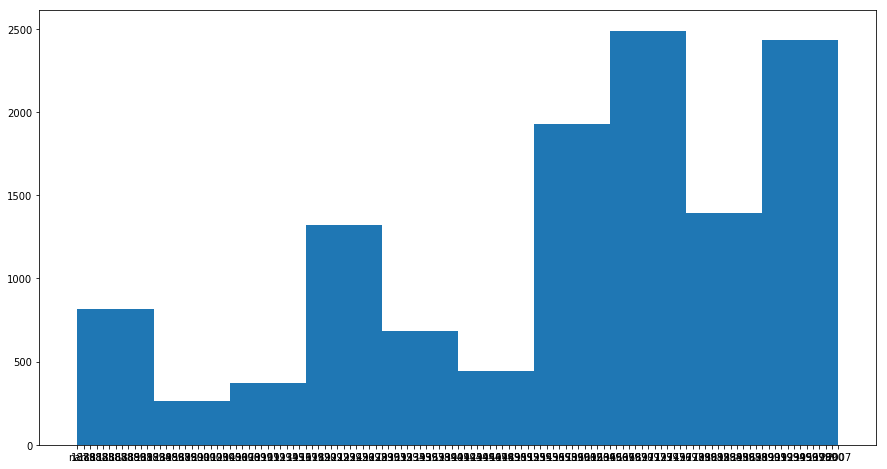

In [100]:
plt.figure(figsize=(15,8))
plt.hist(df['year_built'])


In [101]:
df['architect'].value_counts()

Donald Ross                            285
Robert Trent Jones, Sr.                158
Arthur Hills                           129
Ted Robinson                           114
Tom Bendelow                           100
Joe Lee                                 93
Ed Ault                                 88
Tom Fazio                               85
Jack Nicklaus                           78
Pete Dye                                78
Robert Trent Jones, Jr.                 76
Ron Garl                                75
Geoffrey Cornish                        73
William F. Bell                         70
George Cobb                             60
A. W. Tillinghast                       58
Bruce Devlin &amp; Robert von Hagge     54
Robert Muir Graves                      54
Ellis Maples                            52
Rees Jones                              51
Jerry Matthews                          51
Arnold Palmer &amp; Ed Seay             51
William Diddel                          49
Jack Kidwel

# Part 2

#### Main Goal
Main goal of this project is to use this golf course data to recommend similar golf courses given an input of a golf course

#### Proposed methods and models
Proposed methods include using k-Means clustering to group courses together. Obviously finding ideal number of groups will be critical. Will use groups of similar courses to recommend given input golf course.

Also could look into using a recommender system to use as a model. Research will be required.

I also still might try to write a webscraper to scrape a website like GolfNow.com to get user ratings to try to recommend golf courses using golfer ratings as well as the other data.



#### Risks & assumptions of the data
Right now the risks include the fact that there are a limited amount of features to use in the model. It is limited to course length, golf course slope, golf course rating and par (for 3 different sets of tees; which doesn't add much help). Also year, golf course architect, and public/private will help. 

Also quite a bit of null values which will decrease amount of rows by about a third or so.